In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("episode_data.csv")

In [5]:
df.head()

,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [6]:
# Convert the 'airdate' column to datetime type
df['airdate'] = pd.to_datetime(df['airdate'])

In [7]:
# Convert the 'average_rating' column to numeric type
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

In [8]:
# Insight 1: Ratings for each season
season_ratings = df.groupby('season')['average_rating'].mean()

Text(0, 0.5, 'Average Rating')

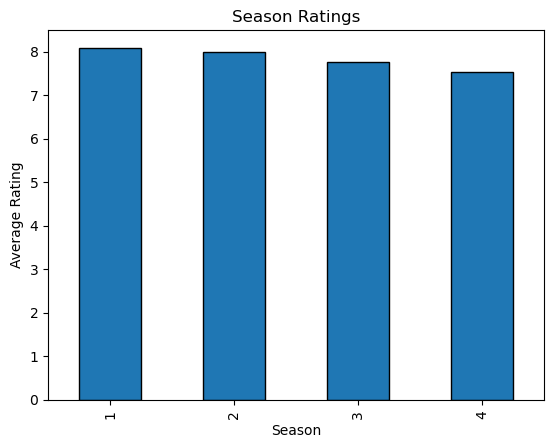

In [5]:
# Plot 1: Ratings for each season
plt.figure()
season_ratings.plot(kind='bar', edgecolor='black')
plt.title("Season Ratings")
plt.xlabel("Season")
plt.ylabel("Average Rating")

In [10]:
# Insight 2: Episode names with average rating > 8 for each season
high_rated_episodes = df[df['average_rating'] > 8].groupby(['season', 'number'])['type'].first()

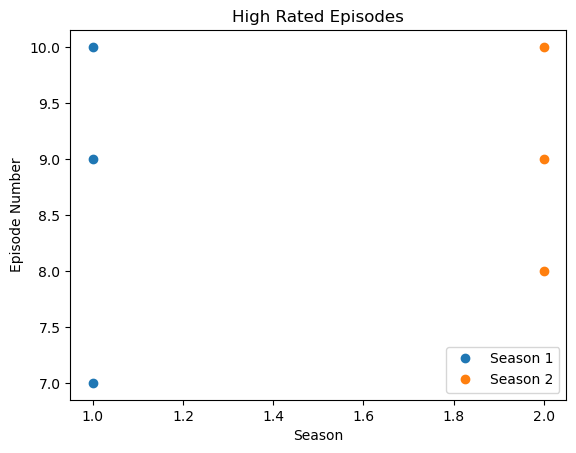

In [6]:
# Plot 2: Episode names with average rating > 8 for each season
plt.figure()
for season, episodes in high_rated_episodes.items():
    plt.plot([season] * len(episodes), episodes, 'o', label=f"Season {season}")
plt.title("High Rated Episodes")
plt.xlabel("Season")
plt.ylabel("Episode Number")
plt.legend()

In [7]:
# Insight 3: Episode names that aired before May 2019
before_may_2019_episodes = df[df['airdate'] < pd.to_datetime('2019-05-01')]['number']

Text(0, 0.5, 'Airdate')

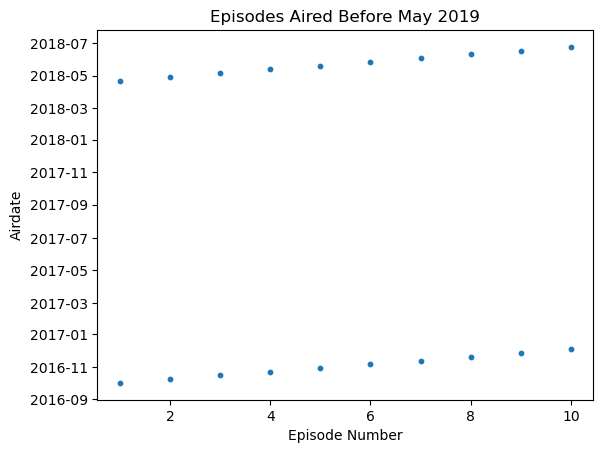

In [9]:
# Plot 3: Episode names that aired before May 2019
plt.figure()
plt.scatter(before_may_2019_episodes, df[df['airdate'] < pd.to_datetime('2019-05-01')]['airdate'], s=10)
plt.title("Episodes Aired Before May 2019")
plt.xlabel("Episode Number")
plt.ylabel("Airdate")

In [10]:
# Insight 4: Episode name with highest and lowest rating for each season
highest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmax()]['number'])
lowest_rated_episodes = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmin()]['number'])

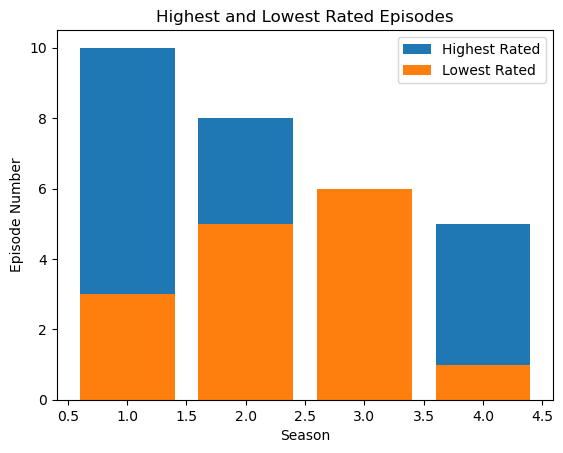

In [11]:
# Plot 4: Episode name with highest and lowest rating for each season
plt.figure()
plt.bar(highest_rated_episodes.index, highest_rated_episodes.values, label='Highest Rated')
plt.bar(lowest_rated_episodes.index, lowest_rated_episodes.values, label='Lowest Rated')
plt.title("Highest and Lowest Rated Episodes")
plt.xlabel("Season")
plt.ylabel("Episode Number")
plt.legend()

In [12]:
# Insight 5: Summary for the most popular (highest ratings) episode in every season
most_popular_summary = df.groupby('season').apply(lambda x: x.loc[x['average_rating'].idxmax()]['summary'])

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

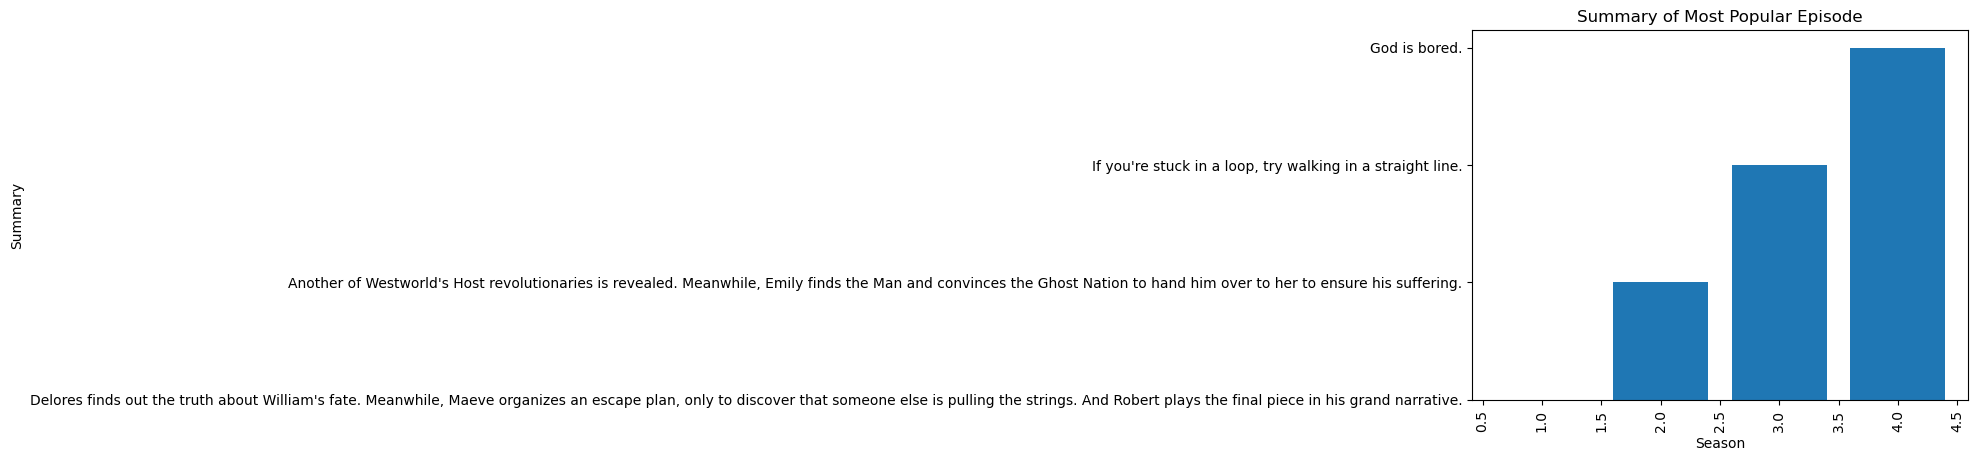

In [14]:
# Plot 5: Summary for the most popular (highest ratings) episode in every season
plt.figure()
plt.bar(most_popular_summary.index, most_popular_summary.values)
plt.title("Summary of Most Popular Episode")
plt.xlabel("Season")
plt.ylabel("Summary")
plt.xticks(rotation=90)